# **Aula 07 - Deep Learning - Perceptron**

## **Objetivos**

*   Conhecer uma intuição sobre Redes Neurais Artificiais RNA
*   Praticar os algoritmos Perceptron e multilayer Perceptron (MLP)

## **Redes Neurais Artificiais**
As redes neurais são modelos computacionais inspirados pelo sistema nervoso de um animal capazes de realizar o aprendizado de máquina bem como o reconhecimento de padrões.

Tais modelos são muitas vezes utilizados para a tarefa de classificação de padrões, podendo gerar classificadores com características variadas.

As redes neurais artificiais possuem em comum o fato de serem constituídas por neurônios que se conectam entre si através de sinapses. A rede neural mais conhecida são as baseadas em Perceptron multicamada (MLP) embora existam outras redes como rede de Kohonem, as redes de base radial e a rede de Hopfield.

## **Os principais componentes dos neurônios são:**

*   Os dendritos, que têm por função receber os estímulos transmitidos pelos outros neurônios;

*   O corpo de neurônio, também chamado de soma, que é responsável por coletar e combinar informações vindas de outros neurônios;

*  O axônio, que é constituído de uma fibra tubular que pode alcançar até alguns metros, e é responsável por transmitir os estímulos para outras células.

Complete_neuron_cell_diagram_en.svg

## **Perceptron**

O classificador Perceptron foi o primeiro classificador baseado em redes neurais que empregou uma regra de aprendizado capaz de garantir a correta separação de classes linearmente separáveis.

No início do treinamento, os pesos dos neurônios recebem valores aleatórios. Então, para cada amostra de treinamento com erro de classificação, os pesos dos neurônios são ajustados de modo a tentar corrigir a classe.

Após o treinamento, cada neurônio na camada de saída testa a pertinência da amostra a uma classe. No caso de mais de um neurônio fornecer resposta positiva a amostra, a classe correspondente ao neurônio de maior resposta vence.

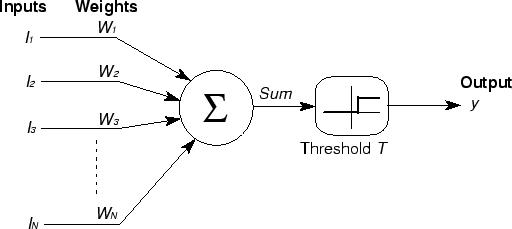

## **A Rede Perceptron**

A rede Perceptron possui um algoritmo de aprendizado supervisionado que consegue definir um classificador que encontra a superfície de separação entre quaisquer duas classes linearmente separáveis.

Vamos aplicar essa rede ao dataset **Iris**, que já conhecemos de longa data, e verificar seu comportamento:

## **Definição do Problema**

Desenvolver um **Modelo de Rede Neural Artificial do tipo Perceptron**, capaz de classificar a espécie da flor íris com base nas suas características de Pétala e Sépala. Para isso vamos usar o dataset da ultima aula (https://archive.ics.uci.edu/ml/datasets/Iris).

Esse dataset contém 150 exemplares de flor íris, separadas em três espécies diferentes: **setosa**, **versicolor** e **virginica**, sendo que foram utilizadas 50 amostras de cada espécie. Os atributos de largura e comprimento da sépala e da pétala de cada flor foram medidos manualmente.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

## **Roteiro**

### **1** - Carregando o Dataset

A biblioteca sklearn é uma biblioteca de aprendizado de máquina em Python amplamente utilizada para tarefas de análise de dados e modelagem estatística. Seu nome completo é scikit-learn e ela oferece uma ampla gama de algoritmos e ferramentas para tarefas de aprendizado de máquina, como classificação, regressão, agrupamento, redução de dimensionalidade, seleção de recursos e pré-processamento de dados.

O sklearn possui algums datasets já pré carragados, de modo que neste primeiro passo, vamos carregar o dataset Iris do sklearn.

In [2]:
# Inicializção das bibliotecas
%matplotlib inline

# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataset Iris
from sklearn.datasets import load_iris

# Carregar o dataset em um objeto
iris = load_iris()

# Acessando os dados e os rótulos
data = iris.data      # Dados de entrada (características)
target = iris.target  # Rótulos de classe
target_names = iris.target_names # Identificação dos rótulos de classes

# Imprimindo informações sobre o conjunto de dados
print("Shape dos dados:", data.shape)
print("Classes:", target)
print("Nomes das Classes:", target_names)

Shape dos dados: (150, 4)
Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Nomes das Classes: ['setosa' 'versicolor' 'virginica']


### **2** - Explorando o Dataset

Como já trabalhamos com esse dataset antes, sabemos exatamente qual a correlação dos atributos com a classificação de flor, por isso, vamos pular a etapa de exploração dos dados e preparar nosso Dataset para implementar o modelo, maaaaas, se quiser, pode revisar essa parte do roteiro no campo abaixo.

In [ ]:
# Explorando o dataset

## **3 - Analisando os dados**

Mesmo caso do item 2 :D

In [ ]:
# Analisando os dados

## **4 - Preparando para implementar o modelo**

vamos separar o dataset em treino e teste, considerando:

* Entradas: São os atributos utilizados pelo modelo para realizar o treinamento e teste;

* Classes: São as classificações das iris de acordo com os atributos. Utilizado para treinar e testar o modelo.

In [5]:
# Convertendo o Dataset para um Data Frame do Pandas
iris_df = pd.DataFrame(data, columns = iris.feature_names)
iris_df['target'] = target
iris_df['class'] = [target_names[i] for i in target]

# Selecionando um sub-dataframe com os campos petal_length e petal_width,
# e outro com a variável de classes
entradas = iris_df[['petal length (cm)', 'petal width (cm)']]
classes = iris_df['class']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (150, 2) e classes (150,)


Com os dois suconjuntos criados precisamos separa-los em dataset de Treino e dataset de Teste.

Se você não se lembra o que isso quer dizer, leia o roteiro da última aula, mas aqui vai uma breve revisão: Normalmente usamos 80% do Dataset para Treino e 20% para Teste, e para isso, vamos usar o **Scikit-Learn** com a função **train_test_split()**. Ele vai pegar o nosso dataset e fazer essa separação de forma aleatória sempre que rodarmos a função.

Para eliminarmos essa aleatoriedade, vamos fixar a semente do algoritmo de geração de números randomicos da biblioteca, usando **random_state = 42**

In [7]:
from sklearn.model_selection import train_test_split

# Separamos 20% para o teste
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2, random_state=42)

#Primeiras linhas do dataframe
print(entradas_treino.head())

print()

print(classes_treino.head())

print()

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

    petal length (cm)  petal width (cm)
22                1.0               0.2
15                1.5               0.4
65                4.4               1.4
11                1.6               0.2
42                1.3               0.2

22        setosa
15        setosa
65    versicolor
11        setosa
42        setosa
Name: class, dtype: object

Formato das tabelas de dados de treino (120, 2) e teste (30, 2)


## **5 - Criando e Treinando o Modelo**

O Perceptron é outro algoritmo de classificação simples e adequado para aprendizado em larga escala. Por padrão:

* Não requer uma taxa de aprendizagem.

* Não é regularizado (penalizado).

* Atualiza seu modelo apenas em caso de erros.

A última característica implica que o Perceptron é ligeiramente mais rápido de treinar do que outros algoritmos

Treinar um modelo no python é simples se usar o Scikit-Learn e treinar um modelo é mais simples ainda: basta criar o classificador, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do scikit-learn:

* O método fit(X,Y) recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros;
* O método predict(X) recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes;

* Não esqueça de importar as bibliotécas com "from sklearn.linear_model import Perceptron";

Para mais informações, leia a documentação em:https://scikit-learn.org/stable/modules/linear_model.html#perceptron

In [15]:
from sklearn.linear_model import Perceptron

modelo = Perceptron(tol=1.7)
modelo.fit(entradas_treino, classes_treino)

Perceptron(tol=1.7)

O parametro **tol** representa o critério de parada.

Se não for None, as iterações irão parar quando (perda > perda_anterior - tol).

O critério de parada é uma condição usada em algoritmos de aprendizado de máquina para determinar quando parar o processo de treinamento.

Se o critério de parada não for None, o algoritmo irá verificar se a perda atual é maior do que a perda anterior subtraída de um valor de tolerância (tol). Se essa condição for verdadeira, as iterações do algoritmo serão interrompidas, indicando que o treinamento atingiu um ponto em que a melhora na perda é considerada insignificante ou abaixo do limite especificado.

Essa verificação permite controlar o número de iterações do algoritmo de acordo com a taxa de convergência e a precisão desejada. Se a diferença entre a perda atual e a perda anterior for menor do que a tolerância especificada, significa que o algoritmo está se aproximando de uma solução estável e não é mais necessário continuar o treinamento.

Essa abordagem é útil para evitar que o algoritmo continue iterando desnecessariamente, especialmente quando os ganhos em termos de redução de perda se tornam mínimos. O critério de parada ajuda a economizar tempo computacional e garante que o treinamento seja interrompido quando atinge um nível satisfatório de convergência.

Agora que temos o nosso modelo treinado, vamos realizar o teste:

In [16]:
classes_encontradas = modelo.predict(entradas_teste)
print(classes_encontradas)

['versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor']


### **6 - Avaliando o Modelo**

Vamos analisar a acuracia do nosso modelo e o F1-Score!

A pontuação F1 pode ser interpretada como uma média ponderada da precision e recall.

* Melhor valor = 1
* Pior valor = 0

A contribuição relativa de precision e recall para a pontuação F1 são iguais. A fórmula para a pontuação F1 é:

F1 = 2 * (precision * recall) / (precision + recall)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

classes_encontradas_train = modelo.predict(entradas_treino)
print("Acerto médio de classificação treino: ",accuracy_score(classes_encontradas_train, classes_treino))

classes_encontradas = modelo.predict(entradas_teste)
print("Acerto médio de classificação teste: ",accuracy_score(classes_encontradas, classes_teste))
print()
print("Resumo das métricas: ")
print(classification_report(classes_encontradas, classes_teste))

Acerto médio de classificação treino:  0.6083333333333333
Acerto médio de classificação teste:  0.5333333333333333

Resumo das métricas: 
              precision    recall  f1-score   support

      setosa       0.50      1.00      0.67         5
  versicolor       1.00      0.39      0.56        23
   virginica       0.18      1.00      0.31         2

    accuracy                           0.53        30
   macro avg       0.56      0.80      0.51        30
weighted avg       0.86      0.53      0.56        30



### **7 -** Exportando o Modelo

Por fim, vamos exportar o nosso modelo para ultizar em nossas aplicações. Para fazer isso, usaremos o Pickle, com o método dump()

In [18]:
import pickle

with open('irisPerceptron.pkl', 'wb') as file:
  pickle.dump(modelo,file)

### **8 -** Importando o Modelo

Agora que temos um arquivo pkl, que é o nosso modelo treinado no formato black box, podemos carrega-lo em nossas aplicações. Por exemplo:

Podemos criar um aplicativo que usa a camera do smartphone para tirar fotos de flores. Teremos um algoritmo que identifica os tamahos de Sépala e Pétala através de Visão Computacional, em seguida, esses tamanhos são passados para o nosso modelo, que identifica qual é a espécie da flor.

In [20]:
# Carregando o modelo salvo
with open('/content/irisPerceptron.pkl', 'rb') as arquivo:
    modelo = pickle.load(arquivo)

dados_de_teste = [[4.2, 1.5]]  # Lista com as características de teste

# Criando o DataFrame com duas colunas
df = pd.DataFrame(dados_de_teste, columns=['petal length (cm)', 'petal width (cm)'])

# Utilizando o modelo carregado
resultado = modelo.predict(df)

print(resultado)

['versicolor']


## **Exercicio**

Agora implemente esse mesmo roteiro com o dataset 'breast_cancer'